In [13]:
# Importamos librerias
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score
import numpy as np
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt




C:\Users\david\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\david\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\david\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [27]:
mnist = fetch_openml('mnist_784',  as_frame=False)

In [28]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

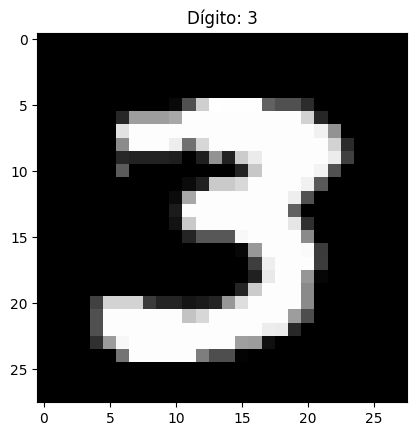

In [29]:
# Seleccionamos la 27 imagen
image = mnist.data[27].reshape(28, 28)  
label = mnist.target[27]

plt.imshow(image, cmap="gray")
plt.title(f"Dígito: {label}")
plt.axis("on")
plt.show()

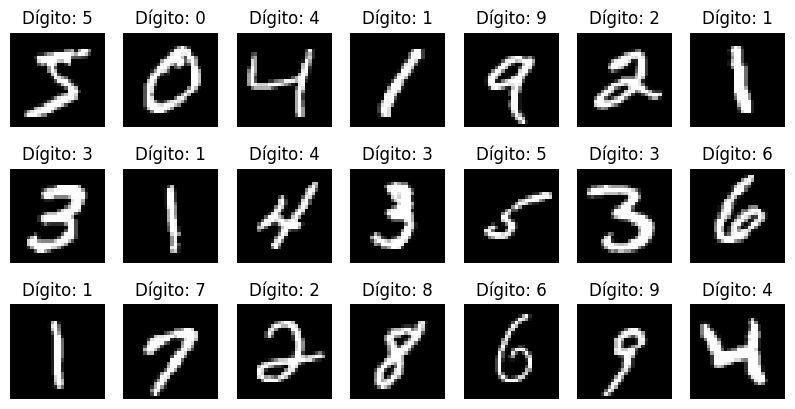

In [30]:
fig, axes = plt.subplots(3, 7, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(mnist.data[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Dígito: {mnist.target[i]}")
    ax.axis("off")
plt.show()

In [31]:
# Conviertiendo el conjunto de datos en un DataFrame de Pandas
df = pd.DataFrame(mnist.data)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.iloc[0]

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Name: 0, Length: 784, dtype: int64

In [39]:


(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [40]:

# Normalizamos el valor de los pixels entre 0 y 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [41]:
def model_builder(hp):
    
    # Definición del modelo
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    
    # Tunning del número de neuronas de la primera hidden layer
    # Seleccionamos el valor optimo entre 32 y 512
    hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
    model.add(keras.layers.Dense(units = hp_units, activation='relu'))
    
    # Tunning del ratio de aprendizaje para el algoritmo de optimizacion
    # Seleccionamos el valor optimo entre [0.01, 0.001, 0.0001]
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate = hp_learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])
    
    return model


In [42]:
tuner = kt.Hyperband(
    model_builder,
    objective = 'val_accuracy', 
    max_epochs = 10,
    factor = 3,
    directory = 'xx',
    project_name = 'clasificacion de imagenes'
)

Reloading Tuner from xx\clasificacion de imagenes\tuner0.json


In [43]:
# Ejecución del tuner para la búsqueda de hiperparámetros
tuner.search(
    X_train, 
    y_train, 
    epochs = 10, 
    validation_data = (X_test, y_test)
)

Trial 26 Complete [00h 06m 20s]
val_accuracy: 0.7569000124931335

Best val_accuracy So Far: 0.9269000291824341
Total elapsed time: 01h 00m 27s


In [49]:
# Obtención de los hiperparámetros óptimos
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Units:", best_hps.get('units'))
print("Learning rate:", best_hps.get('learning_rate'))

Units: 352
Learning rate: 0.001


In [50]:
model = tuner.hypermodel.build(best_hps)

history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    validation_data = (X_test, y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.7783 - loss: 1.2551 - val_accuracy: 0.8241 - val_loss: 0.9463
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8210 - loss: 0.9496 - val_accuracy: 0.8300 - val_loss: 0.9087
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8268 - loss: 0.9189 - val_accuracy: 0.8309 - val_loss: 0.8989
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.8294 - loss: 0.9035 - val_accuracy: 0.8339 - val_loss: 0.8846
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8313 - loss: 0.8942 - val_accuracy: 0.8360 - val_loss: 0.8803
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8330 - loss: 0.8875 - val_accuracy: 0.8356 - val_loss: 0.8790
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.8344 - loss: 0.8824 - val_accuracy: 0.8365 - val_loss: 0.8773
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8347 -

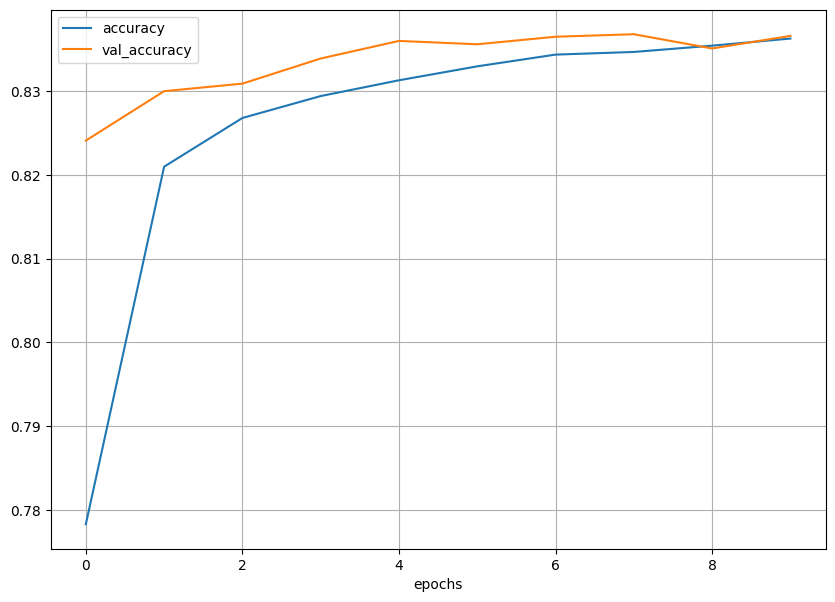

In [51]:
import pandas as pd

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()


In [52]:
# Predicciones en todo el conjunto de test
y_pred_proba = model.predict(X_test)

y_pred = np.argmax(y_pred_proba, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [55]:
sample = X_test[90].reshape(1, 28, 28)   

pred_proba = model.predict(sample)
pred_class = np.argmax(pred_proba)

print("Probabilidades:", pred_proba)
print("Clase predicha:", pred_class)
print("Clase real:", y_test[90])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Probabilidades: [[ 5.2000318  0.684591   4.225282  15.446702   0.         8.487423
   0.         0.         6.8849573  5.208078   0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         

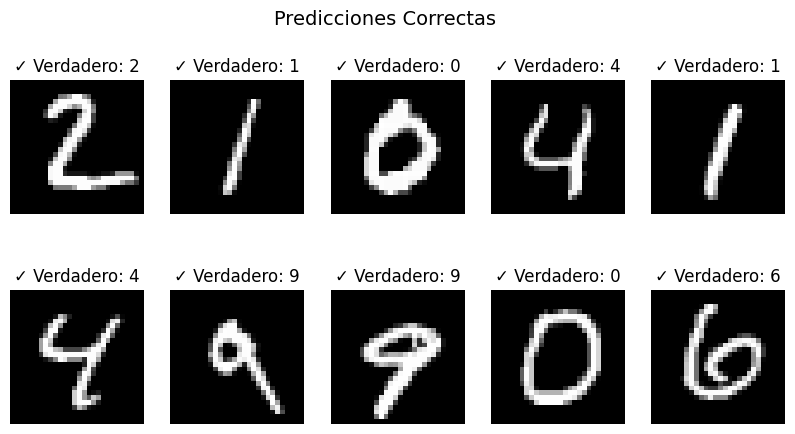

In [56]:
# Encontramos índices donde el modelo acierta y donde se equivoca
indices_correctos = np.where(y_pred == y_test)[0]
indices_incorrectos = np.where(y_pred!= y_test)[0]

# VISUALIZAR CORRECTOS 
fig, axes = plt.subplots(2, 5, figsize=(10, 5))  # 2 filas, 5 columnas
for i, ax in enumerate(axes.flat):
    idx = indices_correctos[i]  # tomamos el i-ésimo índice correcto
    imagen = X_test[idx].reshape(28, 28)  # redimensionamos a 28x28
    ax.imshow(imagen, cmap="gray")
    ax.set_title(f"✓ Verdadero: {y_test[idx]}")
    ax.axis("off")
plt.suptitle("Predicciones Correctas", fontsize=14)
plt.show()


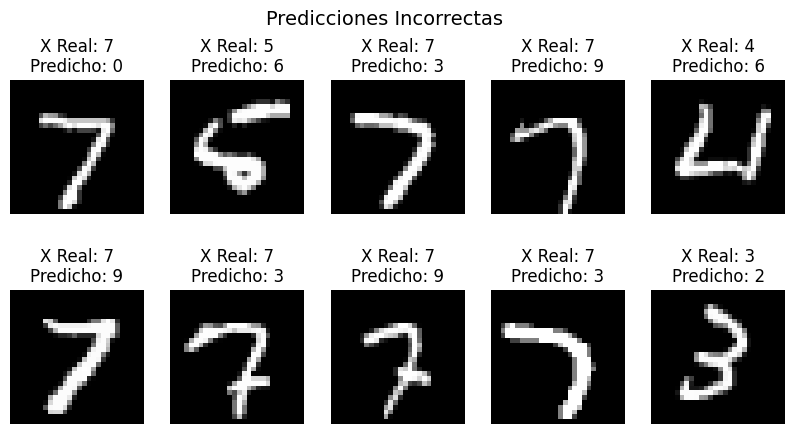

In [58]:
# VISUALIZAR INCORRECTOS
fig, axes = plt.subplots(2, 5, figsize=(10, 5))  
for i, ax in enumerate(axes.flat):
    idx = indices_incorrectos[i]  
    imagen = X_test[idx].reshape(28, 28)
    ax.imshow(imagen, cmap="gray")
    ax.set_title(f"X Real: {y_test[idx]}\nPredicho: {y_pred[idx]}")
    ax.axis("off")
plt.suptitle("Predicciones Incorrectas", fontsize=14)
plt.show()